In [ ]:
%pylab inline
import pandas as pd
import numpy as np
import datetime
import pandas_datareader.data as web
import pprint
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
# install pydrive to load data
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id = "1_71asScU8XI31EIcWF_ikPj0ihvcgfOu"  
file = drive.CreateFile({'id':id}) 
file.GetContentFile('DOW20200323') 

id = "1raZfnsw8fsxxHQ5e5oFIM-zmmXiiWKCX"  
file = drive.CreateFile({'id':id}) 
file.GetContentFile('DOW20200324') 

In [ ]:
import pandas as pd

dow_324 = pd.read_csv('DOW20200324')
dow_323 = pd.read_csv('DOW20200323')
dow_323.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78070 entries, 0 to 78069
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   symbol          78070 non-null  object 
 1   timestamp       78070 non-null  object 
 2   bid_price       74723 non-null  float64
 3   bid_size        74723 non-null  float64
 4   bid_price_lag   74723 non-null  float64
 5   bid_size_lag    74723 non-null  float64
 6   V_of_B          74723 non-null  float64
 7   ask_price       74723 non-null  float64
 8   ask_size        74723 non-null  float64
 9   ask_price_lag   74723 non-null  float64
 10  ask_size_lag    74723 non-null  float64
 11  V_of_A          74723 non-null  float64
 12  VOI             74723 non-null  float64
 13  OIR             74723 non-null  float64
 14  bid_ask_spread  74723 non-null  float64
 15  VWAP_max        77455 non-null  float64
 16  VWAP_mean       77455 non-null  float64
 17  VWAP_min        77455 non-null 

In [ ]:
dow_323.describe([0.05, 0.1, 0.5, 0.9, 0.95])

,bid_price,bid_size,bid_price_lag,bid_size_lag,V_of_B,ask_price,ask_size,ask_price_lag,ask_size_lag,V_of_A,VOI,OIR,bid_ask_spread,VWAP_max,VWAP_mean,VWAP_min,size_mean,EWM,RSI,Stochastic,WilliamsR,MACD,Signal_line,OBV
count,74723.000000,74723.000000,74723.000000,74723.000000,74723.000000,74723.000000,74723.000000,74723.000000,74723.000000,74723.000000,74723.000000,74723.000000,74723.000000,77455.000000,77455.000000,77455.000000,77455.000000,77455.000000,63955.000000,6.491700e+04,6.491700e+04,77455.000000,77455.000000,78070.000000
mean,93.412821,112.454920,-0.002601,-0.028586,14.588333,94.231701,105.392249,0.000792,-0.220173,9.020877,5.567456,0.043119,0.818880,95.260728,95.256918,95.253042,54.182339,94.555297,33.973969,NaN,NaN,-0.017311,-0.017305,-7.830317
std,50.846258,395.273779,1.219997,417.260809,292.771157,51.416378,362.328895,1.672197,263.353071,97.777248,306.617191,0.636003,6.730268,52.178345,52.174358,52.170415,83.897781,51.692163,45.956916,NaN,NaN,0.193553,0.185812,75.301185
min,21.800000,0.000000,-199.930000,-71206.000000,-7873.000000,26.270000,0.000000,-217.710000,-39363.000000,-8613.000000,-8513.000000,-1.000000,-6.210000,26.210000,26.117778,25.933333,0.000000,26.095461,0.000000,-inf,-inf,-3.807692,-3.412256,-4399.000000
5%,28.590000,0.000000,-0.080000,-75.000000,0.000000,28.660000,0.000000,-0.100000,0.000000,0.000000,-100.000000,-1.000000,-0.690000,28.644865,28.644712,28.644342,0.000000,28.715550,0.000000,0.000000e+00,-1.000000e+02,-0.096779,-0.097993,-99.000000
10%,32.360000,0.000000,-0.010000,0.000000,0.000000,33.150000,0.000000,-0.020000,0.000000,0.000000,0.000000,-1.000000,-0.370000,33.125000,33.125000,33.125000,0.000000,33.126341,0.000000,0.000000e+00,-1.000000e+02,-0.047766,-0.047877,-61.500000
50%,89.300000,100.000000,0.000000,0.000000,0.000000,89.920000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060000,89.766001,89.766001,89.765975,50.000000,90.003596,0.000000,4.177993e+00,-9.582201e+01,-0.002781,-0.002841,1.000000
90%,184.150000,108.000000,0.010000,0.000000,100.000000,184.278000,100.000000,0.000000,0.000000,0.000000,100.000000,1.000000,0.890000,186.994864,186.994516,186.993455,100.000000,184.823141,100.000000,1.000000e+02,-0.000000e+00,0.015156,0.015493,51.000000
95%,195.730000,300.000000,0.080000,35.800000,100.000000,196.150000,208.000000,0.070000,0.000000,100.000000,100.000000,1.000000,2.590000,200.746038,200.746038,200.714573,100.000000,197.283386,100.000000,1.000000e+02,-0.000000e+00,0.040754,0.041236,67.666667
max,226.980000,71206.000000,201.030000,70906.000000,71206.000000,318.010000,39463.000000,217.500000,39463.000000,8613.000000,71206.000000,1.000000,228.000000,232.502887,232.502887,232.502887,4500.000000,232.766949,100.000000,inf,inf,7.577438,6.748312,2272.714286


In [ ]:
stocks = dow_323['symbol'].unique()
stocks 

array(['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIA', 'DIS', 'DOW',
       'GS', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK',
       'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT',
       'XOM'], dtype=object)

### Data Cleaning

In [ ]:
dow_323 = dow_323.replace([np.inf, -np.inf], np.nan)
dow_324 = dow_324.replace([np.inf, -np.inf], np.nan)

In [ ]:
dow_323 = dow_323.dropna()
dow_324 = dow_324.dropna()

In [ ]:
dow_323 = dow_323.loc[:, :]
dow_324 = dow_324.loc[:, :]

### Visualization: VWAP_mean

https://www.kaggle.com/kratisaxena/stock-market-technical-indicators-visualization

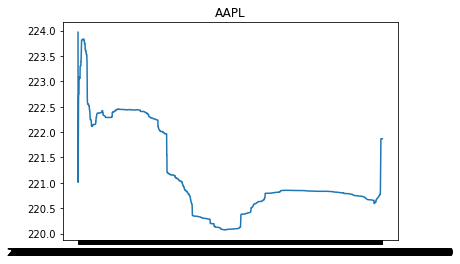

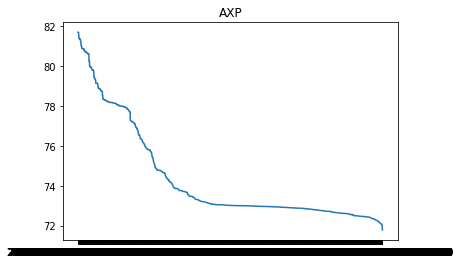

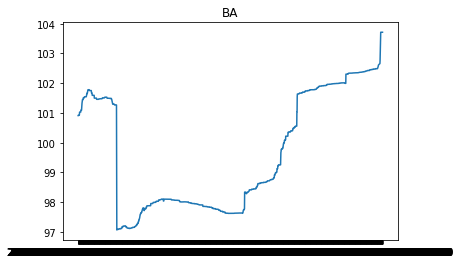

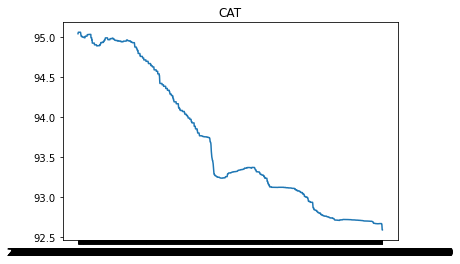

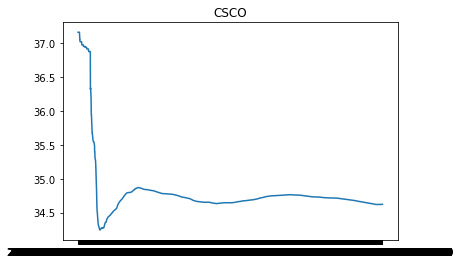

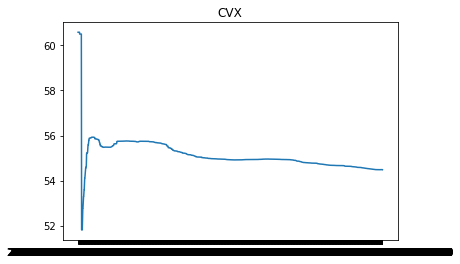

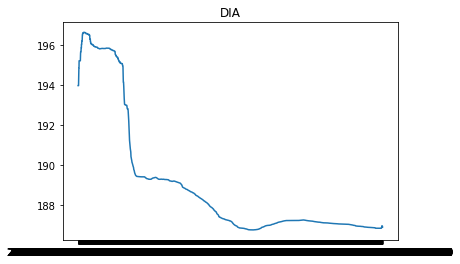

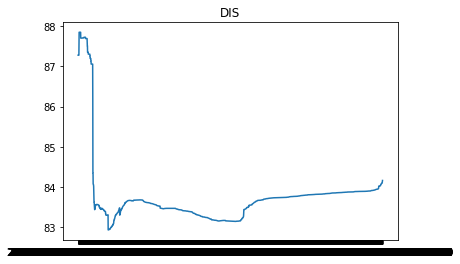

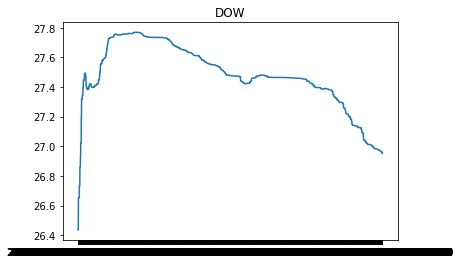

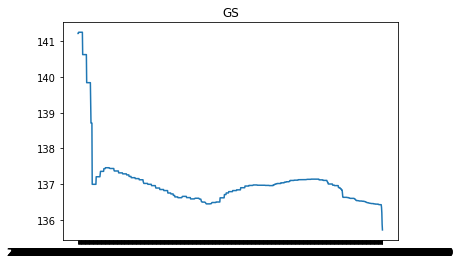

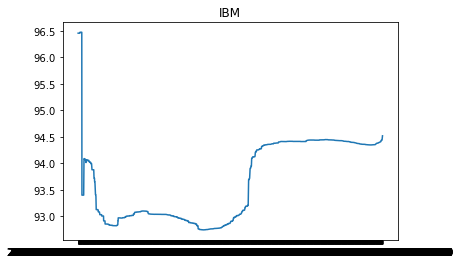

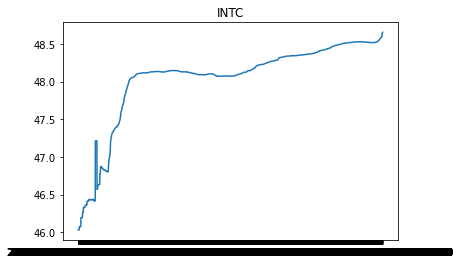

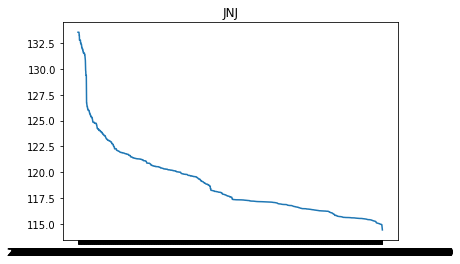

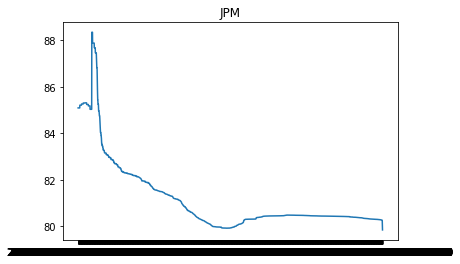

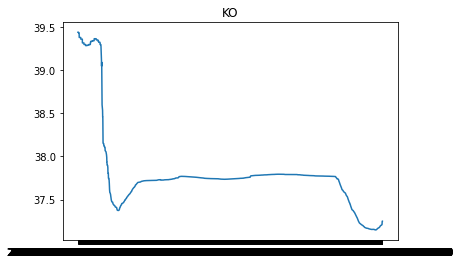

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl

for i in stocks[:15]:
  fig = plt.figure()
  stock = dow_323[dow_323['symbol'] == i]

  ax = fig.add_subplot(111)
  ax.set_title(i)
  ax.plot(stock['timestamp'], stock['VWAP_mean'])
  

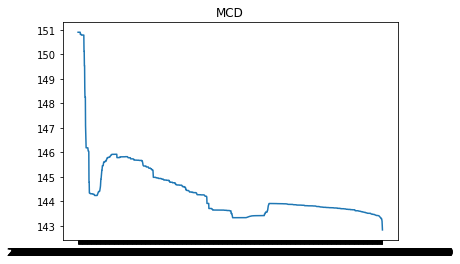

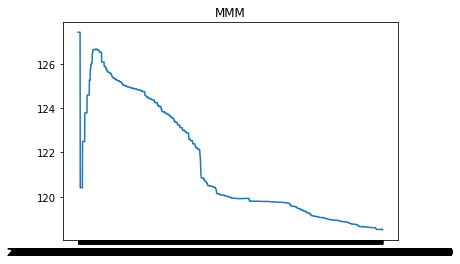

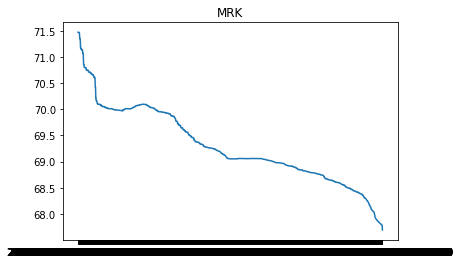

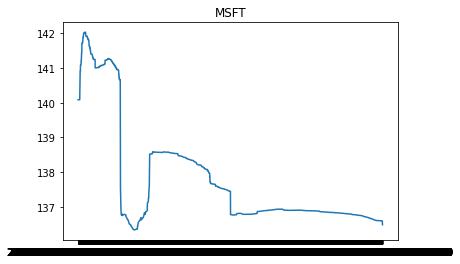

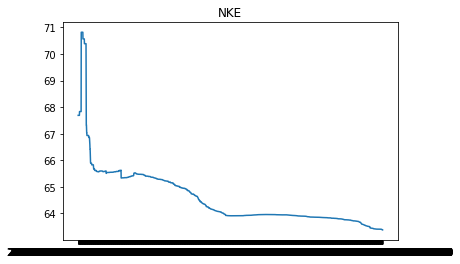

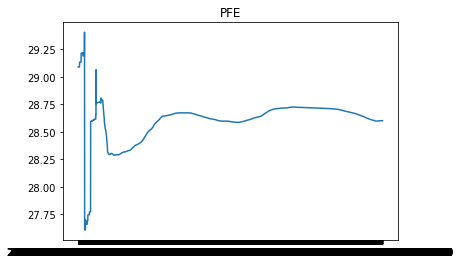

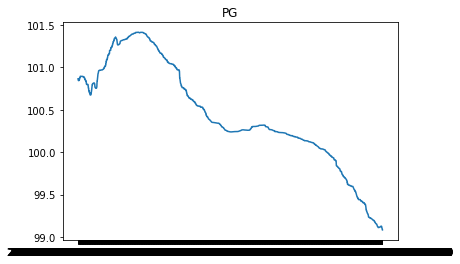

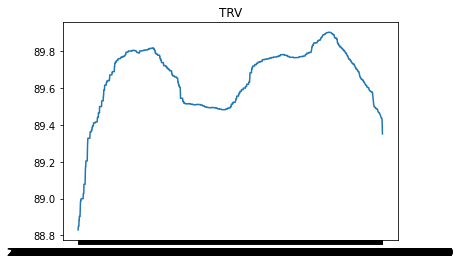

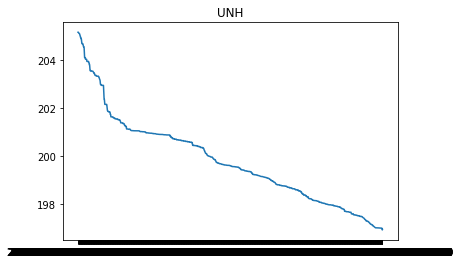

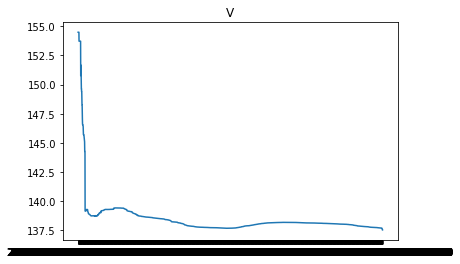

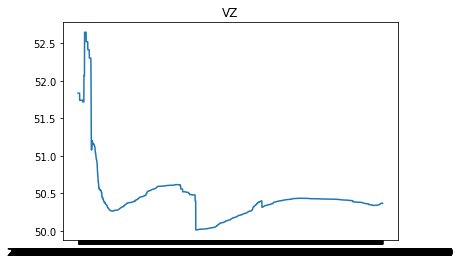

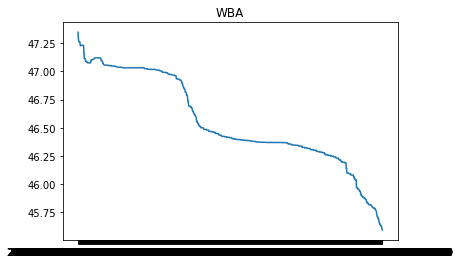

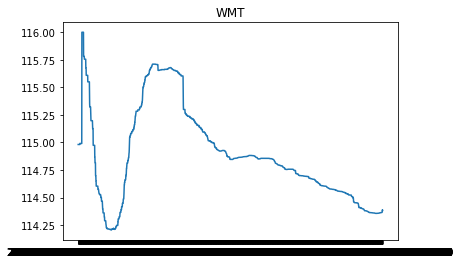

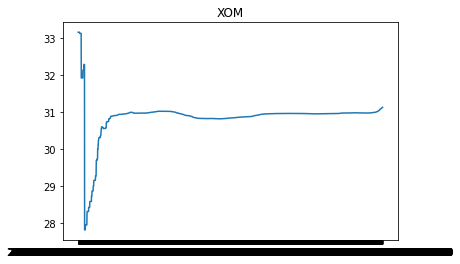

In [ ]:
for i in stocks[15:29]:
  fig = plt.figure()
  stock = dow_323[dow_323['symbol'] == i]

  ax = fig.add_subplot(111)
  ax.set_title(i)
  ax.plot(stock['timestamp'], stock['VWAP_mean'])
  

In [ ]:
dow_323 = dow_323[dow_323['symbol'] == 'AAPL']
dow_323.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 456 to 2807
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   symbol          2292 non-null   object 
 1   timestamp       2292 non-null   object 
 2   bid_price       2292 non-null   float64
 3   bid_size        2292 non-null   float64
 4   bid_price_lag   2292 non-null   float64
 5   bid_size_lag    2292 non-null   float64
 6   V_of_B          2292 non-null   float64
 7   ask_price       2292 non-null   float64
 8   ask_size        2292 non-null   float64
 9   ask_price_lag   2292 non-null   float64
 10  ask_size_lag    2292 non-null   float64
 11  V_of_A          2292 non-null   float64
 12  VOI             2292 non-null   float64
 13  OIR             2292 non-null   float64
 14  bid_ask_spread  2292 non-null   float64
 15  VWAP_max        2292 non-null   float64
 16  VWAP_mean       2292 non-null   float64
 17  VWAP_min        2292 non-null  

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

y_dow_323 = dow_323['VWAP_mean']
x_dow_323 = dow_323.drop(['symbol', 'timestamp', 'VWAP_max', 'VWAP_mean', 'VWAP_min'], axis=1)

dow_324 = dow_324[dow_324['symbol'] == 'AAPL']
y_dow_324 =  dow_324['VWAP_mean']
x_dow_324 = dow_324.drop(['symbol', 'timestamp', 'VWAP_max', 'VWAP_mean', 'VWAP_min'], axis=1)

scaler = StandardScaler()
normalizer = Normalizer()

#Scale and Normalize train data - x_dow_323
scaled_x_dow_323 = scaler.fit_transform(x_dow_323)
x_dow_323 = normalizer.fit_transform(scaled_x_dow_323)

#Scale and Normalize test data - x_dow_324
scaled_x_dow_324 = scaler.transform(x_dow_324)
x_dow_324 = normalizer.transform(scaled_x_dow_324)

regr = RandomForestRegressor(random_state=0)
parameters = {'max_depth': range(2, 10),  'n_estimators':range(2, 20)}
reg = GridSearchCV(regr, parameters)
reg.fit(x_dow_323, y_dow_323)
reg.best_params_

{'max_depth': 3, 'n_estimators': 18}

In [ ]:
reg.score(x_dow_323, y_dow_323)

0.49330371205442425

In [ ]:
reg.score(x_dow_324, y_dow_324)

-9.231226384207805

In [ ]:
model = RandomForestRegressor(max_depth=9,n_estimators=15, random_state=0)
model.fit(x_dow_323, y_dow_323)
model.feature_importances_

array([0.01972743, 0.02161749, 0.00518115, 0.00945899, 0.00977323,
       0.0529979 , 0.05522822, 0.00886215, 0.00799598, 0.01099368,
       0.00349811, 0.08390819, 0.01979432, 0.00953613, 0.15124645,
       0.15481572, 0.00725994, 0.01953876, 0.06083691, 0.27949682,
       0.00823242])